In [31]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('D:\IMLP342\data\iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
df['Species'].value_counts()

Versicolor    50
Setosa        50
Virginica     50
Name: Species, dtype: int64

In [4]:
pd.isnull(df).sum() #查看有無缺漏值

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
Species         0
dtype: int64

In [5]:
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species']) 

scaler = StandardScaler()

sepal_length = np.array(df['sepal.length']).reshape(-1,1)
sepal_width = np.array(df['sepal.width']).reshape(-1,1)
petal_length = np.array(df['petal.length']).reshape(-1,1)
petal_width = np.array(df['petal.width']).reshape(-1,1)

df["sepal.length"] = scaler.fit_transform(sepal_length)
df["sepal.width"] = scaler.fit_transform(sepal_width)
df["petal.length"] = scaler.fit_transform(petal_length)
df["petal.width"] = scaler.fit_transform(petal_width)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(
     df.drop(['Species'],axis=1), df['Species'], test_size=0.3, random_state = 1)

In [7]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x_train, y_train)
train_predict = kmeans.predict(x_train)
test_predict = kmeans.predict(x_test)
print("test predict: ", test_predict)
print('\n')
print("test value: ", np.array(y_test))

test predict:  [0 1 2 0 2 2 2 0 0 2 1 0 2 2 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 1 1 2 1 2 1 0 1
 0 1 2 2 0 1 2 1]


test value:  [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]


In [8]:
y_train = pd.DataFrame(y_train)
p_train = pd.DataFrame(train_predict, columns = ['Predict'])

In [30]:
print(confusion_matrix(y_train,p_train))
print('\n')
print(classification_report(y_train,p_train))

[[36  0  0]
 [ 0 25  7]
 [ 0 11 26]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.69      0.78      0.74        32
           2       0.79      0.70      0.74        37

    accuracy                           0.83       105
   macro avg       0.83      0.83      0.83       105
weighted avg       0.83      0.83      0.83       105



In [15]:
print(pd.crosstab(y_test, test_predict, 
           rownames = ["label"], colnames = ["predict"]))
print('\n')
print(classification_report(y_test, test_predict))

predict   0   1   2
label              
0        14   0   0
1         0  14   4
2         0   3  10


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.82      0.78      0.80        18
           2       0.71      0.77      0.74        13

    accuracy                           0.84        45
   macro avg       0.85      0.85      0.85        45
weighted avg       0.85      0.84      0.85        45



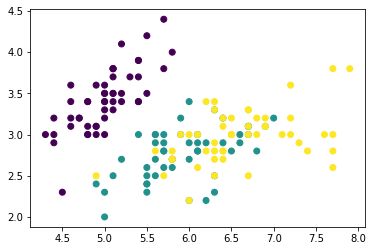

In [11]:
dff = pd.read_csv('D:\IMLP342\data\iris.csv')
plt.scatter(dff['sepal.length'],dff['sepal.width'],c=df['Species'])

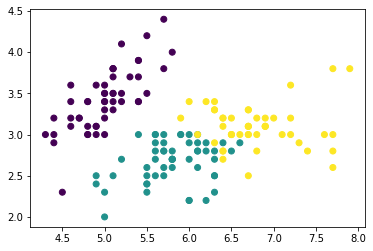

In [12]:
plt.scatter(dff['sepal.length'],dff['sepal.width'],c=kmeans.predict(
     df.drop(['Species'],axis=1)))

In [33]:
print(accuracy_score(y_train,p_train))

0.8285714285714286


In [34]:
print(accuracy_score(y_test, test_predict))

0.8444444444444444
